# Workflow Debugging

Metal device set to: Apple M1 Pro
Epoch 1/100


2022-04-18 16:41:22.321652: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-18 16:41:22.322019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-18 16:41:22.436270: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/18 [===============>..............] - ETA: 0s - loss: 4.4815 - accuracy: 0.5063 

2022-04-18 16:41:22.693426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 7ms/step - loss: 3.3076 - accuracy: 0.5887
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 1.6137 - accuracy: 0.6684
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 1.5726 - accuracy: 0.7110
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9224 - accuracy: 0.7447
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.7420 - accuracy: 0.7411
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7955 - accuracy: 0.7926
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.7183 - accuracy: 0.7713
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5899 - accuracy: 0.8121
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5895 - accuracy: 0.7926
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6321 - accuracy: 0.8032
Epoch 11/100
18/18 [=

18/18 [==============================] - 0s 6ms/step - loss: 0.2000 - accuracy: 0.9220
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1751 - accuracy: 0.9344
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1901 - accuracy: 0.9273
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.9309
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1969 - accuracy: 0.9113
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1834 - accuracy: 0.9273
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2142 - accuracy: 0.9255
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2166 - accuracy: 0.8972
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1858 - accuracy: 0.9291
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 0.1786 - accuracy: 0.9255
Epoch 93/100


2022-04-18 16:41:33.082842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Accuracy on test data: 0.9380165934562683% 
 Error on test data: 0.06198340654373169
len(y_predicted) 242
graphstate_35  predicted:  0  should be:  5  diff:  161.93703452945158
graphstate_24  predicted:  0  should be:  1  diff:  88.18328658477606
ghz_130  predicted:  5  should be:  0  diff:  0
wstate_87  predicted:  0  should be:  5  diff:  412.4034239288135
ae_11  predicted:  1  should be:  2  diff:  1187.6001189076794
wstate_90  predicted:  0  should be:  5  diff:  323.275365122352
dj_9  predicted:  5  should be:  2  diff:  171.90262524131927
wstate_89  predicted:  0  should be:  5  diff:  347.6610890801817
qpeinexact_19  predicted:  0  should be:  1  diff:  83.89041493374634
dj_11  predicted:  5  should be:  2  diff:  207.79435327120606


2022-04-18 16:41:33.299354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


wstate_94  predicted:  0  should be:  5  diff:  355.90395589515447
wstate_103  predicted:  0  should be:  5  diff:  354.70122835864186
wstate_98  predicted:  0  should be:  5  diff:  412.74630041590126
wstate_97  predicted:  0  should be:  5  diff:  421.16113744075847
portfolioqaoa_9  predicted:  0  should be:  2  diff:  978.7745763098462


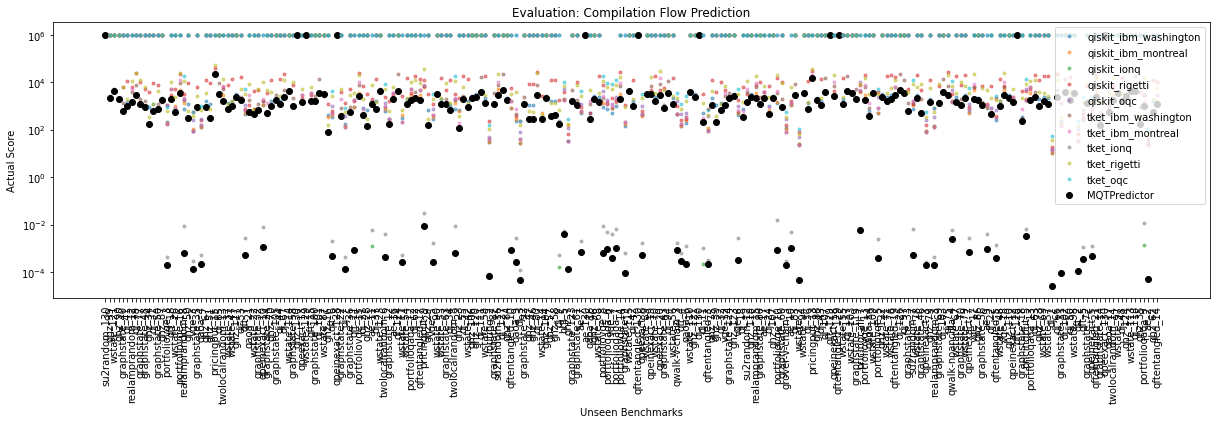

In [2]:
from evaluator.eval import extract_training_data_from_json, train_simple_ml_model
import numpy as np
training_data, names_list, scores_list = extract_training_data_from_json("json_data_big_server.json")
#print(names_list)
X, y = zip(*training_data)
X = np.array(X)
y = np.array(y)
X = X[:, [ 3,  5, 12, 14, 16, 17, 19, 20, 23, 25, 27, 30 ,37 ,38, 39, 40]]
X.shape
train_simple_ml_model(X,y, True, names_list, scores_list)

In [4]:
from sklearn.model_selection import train_test_split
from evaluator.src import utils
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

openqasm_gates_list = utils.get_openqasm_gates()
res = [openqasm_gates_list[i] for i in range(0, len(openqasm_gates_list))]
res.append("num_qubits")


features = np.sort(np.array(res))
features = features[[3,  5, 12, 14, 16, 17, 19, 20, 23, 25, 27, 30 ,37 ,38, 39, 40]]
print(features)


['ccx' 'cp' 'cu1' 'cx' 'cz' 'h' 'num_qubits' 'p' 'rx' 'ry' 'rzz' 'swap'
 'u1' 'u2' 'u3' 'x']


1 0.8148148148148148
2 0.8592592592592593
3 0.837037037037037
4 0.8666666666666667
5 0.8518518518518519
6 0.8740740740740741
7 0.837037037037037
8 0.8666666666666667
9 0.8888888888888888


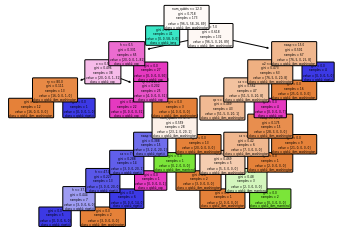

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

#Create a Gaussian Classifier
for i in range(1,10,1):
    clf=RandomForestClassifier(n_estimators=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print(i, np.mean(y_pred == y_test))
    plot_tree(clf.estimators_[0], 
          feature_names=features,
          class_names=utils.get_machines(),
          filled=True, impurity=True, 
          rounded=True);

In [10]:
from sklearn.svm import SVC
#Create a Gaussian Classifier

clf=SVC(kernel="linear")

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(np.mean(y_pred == y_test))

0.837037037037037


In [11]:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(np.mean(y_pred == y_test))

0.5185185185185185


In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier


clf = AdaBoostClassifier(n_estimators=10)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(np.mean(y_pred == y_test))

0.5407407407407407


0.9586466165413534


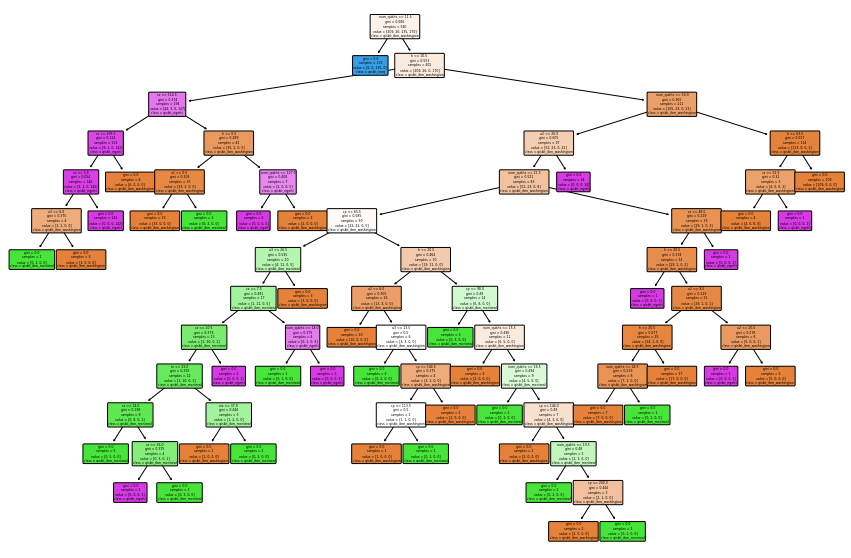

In [6]:

import matplotlib.pyplot as plt
from evaluator.src import utils
from sklearn.tree import plot_tree
from sklearn import tree


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)

fig = plt.figure(figsize=(15, 10))

y_pred=clf.predict(X_test)
print(np.mean(y_pred == y_test))
plot_tree(clf, 
          feature_names=features,
          class_names=utils.get_machines(),
          filled=True, impurity=True, 
          rounded=True);
plt.savefig("DecisionTreeClassifier.png", dpi=600)

# Debugging

In [1]:
from evaluator import eval
from evaluator.src import utils, pytket_plugin, qiskit_plugin
import pytest
from pytket.extensions.qiskit import qiskit_to_tk
from mqt.bench import get_one_benchmark
from pytket import circuit, OpType

In [6]:
benchmarks = [
    "dj",
    "grover-noancilla",
    "grover-v-chain",
    "ghz",
    "graphstate",
    "qft",
    "qftentangled",
    "qpeexact",
    "qpeinexact",
    "qwalk-noancilla",
    "qwalk-v-chain",
    "realamprandom",
    "su2random",
    "twolocalrandom",
    "vqe",
    "wstate",
    "qaoa",
    "portfoliovqe",
    "portfolioqaoa",
    "qgan",
]
res = []
timeout=10
for benchmark in benchmarks:
    for num_qubits in range(4, 5, 1):
        print(benchmark, num_qubits)
        qc = eval.timeout_watcher(
            get_one_benchmark,
            [benchmark, 1, num_qubits],
            timeout,
        )
        if not qc:
            break
        print("1")
        actual_num_qubits = qc.num_qubits
        qiskit_gates = eval.timeout_watcher(eval.get_qiskit_gates, [qc], timeout)
        if not qiskit_gates:
            break
        try:
            qc_tket = qiskit_to_tk(qc)
            ops_list = qc.count_ops()
            print("2")
            feature_vector = eval.dict_to_featurevector(ops_list, actual_num_qubits)
            tket_gates = eval.timeout_watcher(eval.get_tket_gates, [qc_tket], timeout)
            
            print("3")
            if not tket_gates:
                break
            benchmark_name = benchmark + "_" + str(num_qubits)
            res.append(
                (
                    benchmark,
                    feature_vector,
                    qiskit_gates + tket_gates,
                    benchmark_name,
                )
            )
        except Exception as e:
            print("fail: ", e)


dj 4
1
2
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
3
grover-noancilla 4
1
2
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
3
grover-v-chain 4
1
2
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
3
ghz 4
1
2
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
3
graphstate 4
1
2
measure gate not found in openQASM 2.0 gateset
barrier gate not found in openQASM 2.0 gateset
3
qft 4
1


KeyboardInterrupt: 